### Benjamin Crom (Panther# 002-36-7349)
__Mini-Project 2: Logistic Regression & Disaster Survival__<br>
__CS 6980: Introduction to Data Science__<br>
__29 January 2018__

__Access this notebook online: https://goo.gl/mTEWkp__

![title](assignment.png)

In [1]:
import collections
import matplotlib.pyplot
import numpy
import pandas

from matplotlib.ticker import MaxNLocator

# ======================== LOAD DATA ========================
csv_array = numpy.genfromtxt('titanic_data.csv', delimiter=',')
data = csv_array[1:]
Y = data[:,0]   # labels
X = data[:,1:]  # feature vectors

![title](fig_2_2_1.png)

In [2]:
def l_beta(X, Y, beta):
    return sum(
        [
            numpy.log(
                (1 / (1 + numpy.exp(-1 * numpy.dot(numpy.transpose(beta), X[i]))))**Y[i] *
                (1 - (1 / (1 + numpy.exp(-1 * numpy.dot(numpy.transpose(beta), X[i])))))**(1 - Y[i])
            )
            for i in range(len(X))
        ]
    )

![title](fig_2_3.png)


In [3]:
def gradient_l_beta(X, Y, beta):
    return sum(
        [
            (Y[i] - (1 / (1 + numpy.exp(-1 * numpy.dot(numpy.transpose(beta), X[i]))))) * X[i]
            for i in range(len(X))
        ]
    )

![title](fig_c.png)


In [4]:
def gradient_ascent(X, Y, beta, eta, tol):
    last_l_beta = l_beta(X, Y, beta)
    beta = beta + (eta * gradient_l_beta(X, Y, beta))
    new_l_beta = l_beta(X, Y, beta)

    while numpy.absolute(new_l_beta - last_l_beta) > tol:
        last_l_beta = new_l_beta
        beta = beta + (eta * gradient_l_beta(X, Y, beta))
        new_l_beta = l_beta(X, Y, beta)
        
    return beta, l_beta(X, Y, beta)

![title](fig_d_1.png)

In [5]:
# ======================= SPLIT DATA ========================
is_training = numpy.random.randint(0, 5, len(X)) > 0
is_test = numpy.invert(is_training)
Y_train = Y[is_training]
X_train = X[is_training]
Y_test = Y[is_test]
X_test = X[is_test]

![title](fig_e.png)

In [6]:
# ==================== GRADIENT ASCENT ======================
eta = 0.0000001
tol = 0.0017
beta = numpy.array([-0.03, 0.05, -0.02, -0.01, -0.0001, 0.018])
beta, l_beta = gradient_ascent(X_train, Y_train, beta, eta, tol)

In [7]:
def classify_logReg(X, beta):
    Y_hat = []
    for i in range(len(X)):
        y_1_val = (1 / (1 + numpy.exp(-1 * numpy.dot(numpy.transpose(beta), X[i]))))
        y_0_val = (1 - (1 / (1 + numpy.exp(-1 * numpy.dot(numpy.transpose(beta), X[i])))))
        
        if y_1_val > y_0_val:
            Y_hat.append(1.0)
        else:
            Y_hat.append(0.0)
            
    return numpy.array(Y_hat)

In [8]:
# ========================== TEST ===========================
Y_hat = classify_logReg(X_test, beta)
error = sum(abs(Y_hat - Y_test)) / len(Y_test)

In [9]:
print(f'{eta} seems to best maximize l_beta. The largest l_beta I can achieve seems to be {round(l_beta, 2)}.')

1e-07 seems to best maximize l_beta. The largest l_beta I can achieve seems to be -430.37.


![title](fig_f.png)

In [10]:
print(f'Coefficient vector beta: {beta}')

Coefficient vector beta: [-0.07363709  0.08057376 -0.02472657 -0.04288482 -0.0059891   0.01422739]


In [11]:
print(f'Accuracy: {round((1 - error)*100, 2)}%')

Accuracy: 64.57%


![title](fig_g.png)

In [12]:
# ================== WOULD I HAVE SURVIVED ==================
my_class = 2
my_gender = 0
my_age = 30
my_ss = 1
my_pc = 1
idx = numpy.array([p for p in X if p[0] == my_class])
my_fare = numpy.mean(idx, axis=0)[5]

# Construct my feature vector
my_x = numpy.array([my_class, my_gender, my_age, my_ss, my_pc, my_fare])

# Classify
my_y = classify_logReg([my_x], beta)

if my_y:
    print('I would have survived.')
else:
    print('I would not have survived.')

I would not have survived.


In [13]:
def get_min_fare(v):
    fare = 0
    survived = 0

    while not survived:
        fare += 1
        this_feature_vector = numpy.array([v[0], v[1], v[2], v[3], v[4], fare])
        survived = classify_logReg([this_feature_vector], beta)
        
    return fare

benjamin_crom_feature_vector = numpy.array([2, 0, 30, 1, 1, 0])
min_fare = get_min_fare(benjamin_crom_feature_vector)
print(f'I would have survived if I paid {min_fare} for my fare.')

benjamin_crom_feature_vector = numpy.array([1, 0, 30, 1, 1, 0])
min_fare = get_min_fare(benjamin_crom_feature_vector)
print(f'I would have survived if I sat in first class and paid {min_fare} for my fare.')

benjamin_crom_feature_vector = numpy.array([1, 0, 30, 0, 1, 0])
min_fare = get_min_fare(benjamin_crom_feature_vector)
print(f'I would have survived if I sat in first class, had no spouse aboard, and paid {min_fare} for my fare.')

print('Having parents/children aboard has very minimal impact on survival.')

I would have survived if I paid 66 for my fare.
I would have survived if I sat in first class and paid 61 for my fare.
I would have survived if I sat in first class, had no spouse aboard, and paid 58 for my fare.
Having parents/children aboard has very minimal impact on survival.


![title](fig_h.png)

Class, Gender, and Age have the biggest impact on survival per invidual unit of change:


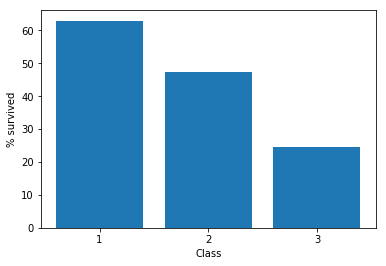

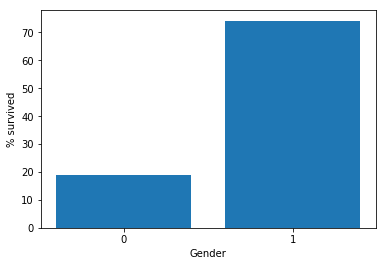

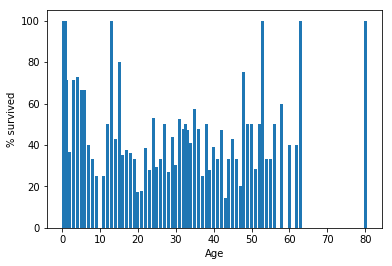

In [14]:
# ========== VISUALIZE 3 MOST IMPORTANT VARIABLES ===========
def survived_by_feature(feature_index, feature_x_label):
    survived_counter = collections.Counter([p[feature_index] for p in X[Y == 1]])
    total_counter = collections.Counter([p[feature_index] for p in X])
    ratio_dict = {key: survived_counter[key] / total_counter[key]
                  for key in total_counter}

    tuple_list = sorted(ratio_dict.items(), key=lambda tup: tup[0])
    x = [t[0] for t in tuple_list]
    y = [t[1]*100 for t in tuple_list]

    ax = matplotlib.pyplot.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    matplotlib.pyplot.bar(x, y)
    matplotlib.pyplot.xlabel(feature_x_label)
    matplotlib.pyplot.ylabel('% survived')
    matplotlib.pyplot.show()

print('Class, Gender, and Age have the biggest impact on survival per invidual unit of change:')
for feature_index, feature_x_label in [(0, 'Class'), (1, 'Gender'), (2, 'Age')]:
    survived_by_feature(feature_index, feature_x_label)